## Import

In [2]:
%matplotlib inline
import os 
from glob import glob

from PIL import Image
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model

import sys
import pickle
import gzip

In [3]:
def init_gpu():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        except RuntimeError as e:
            print(e)

## Set hyper parameter

In [4]:
# Hyper Parameter 
batch_size = 64
data_height = 32 
data_width = 32
channel_n = 3
num_classes = 43

In [5]:
def data():
    with gzip.open('pickle/train_images.pickle', 'rb') as f:
        train_images = pickle.load(f)

    with gzip.open('pickle/train_labels.pickle', 'rb') as f:
        train_labels = pickle.load(f)

    with gzip.open('pickle/test_images.pickle', 'rb') as f:
        test_images = pickle.load(f)

    with gzip.open('pickle/test_labels.pickle', 'rb') as f:
        test_labels = pickle.load(f)


    return train_images, train_labels, test_images, test_labels

In [17]:
def create_model(train_images, train_labels, test_images, test_labels):
    model = models.Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(data_height, data_width, 3)))
    model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    
    
    model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    #model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer='adam',
        metrics=["accuracy"])
    
    return model

In [18]:
init_gpu()

X_train, Y_train, X_test, Y_test = data()

model = create_model(X_train, Y_train, X_test, Y_test)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 6, 6, 64)         

In [19]:
history = model.fit(X_train, Y_train, epochs=20, batch_size=64, validation_data=(X_test, Y_test))


Train on 39209 samples, validate on 12630 samples
Epoch 1/20
39209/39209 [==============================] - 6s 155us/sample - loss: 1.0888 - acc: 0.6958 - val_loss: 0.2582 - val_acc: 0.9366
Epoch 2/20
39209/39209 [==============================] - 7s 175us/sample - loss: 0.2135 - acc: 0.9375 - val_loss: 0.1842 - val_acc: 0.9559
Epoch 3/20
39209/39209 [==============================] - 7s 175us/sample - loss: 0.1298 - acc: 0.9620 - val_loss: 0.1212 - val_acc: 0.9686
Epoch 4/20
39209/39209 [==============================] - 7s 175us/sample - loss: 0.0962 - acc: 0.9713 - val_loss: 0.1263 - val_acc: 0.9688
Epoch 5/20
39209/39209 [==============================] - 6s 159us/sample - loss: 0.0846 - acc: 0.9739 - val_loss: 0.1011 - val_acc: 0.9747
Epoch 6/20
39209/39209 [==============================] - 7s 166us/sample - loss: 0.0624 - acc: 0.9812 - val_loss: 0.1121 - val_acc: 0.9716
Epoch 7/20
39209/39209 [==============================] - 7s 175us/sample - loss: 0.0595 - acc: 0.9819 - val_l

In [21]:
model_json = model.to_json()

with open("model/model.json", "w") as json_file : 
    json_file.write(model_json)

model.save_weights("model/model.h5")

In [22]:
model.evaluate(X_test, Y_test, verbose=2)

12630/12630 - 2s - loss: 0.0834 - acc: 0.9812


[0.08336109051445219, 0.98123515]

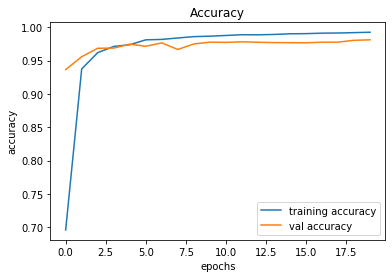

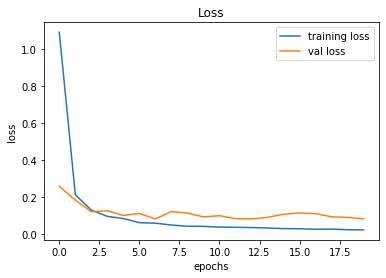

In [23]:
#Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()